In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from libraries import lib

In [2]:
data = pd.read_csv('data/KAN_n_6_data.csv')
data = data.set_index(['N', 'h', 'trial', 'epoch'])
data

energy  epoch time
N   h    trial epoch                       
6.0 0.1  0.0   0.0    -0.318690    0.295362
               1.0    -0.284893    0.341580
               2.0    -0.098901    0.440682
               3.0    -0.321469    0.283654
               4.0    -0.505872    0.284705
...                         ...         ...
    10.0 9.0   195.0 -60.148659    0.288519
               196.0 -60.148487    0.297865
               197.0 -60.144424    0.388490
               198.0 -60.141663    0.299205
               199.0 -60.156555    0.276262

[6000 rows x 2 columns]

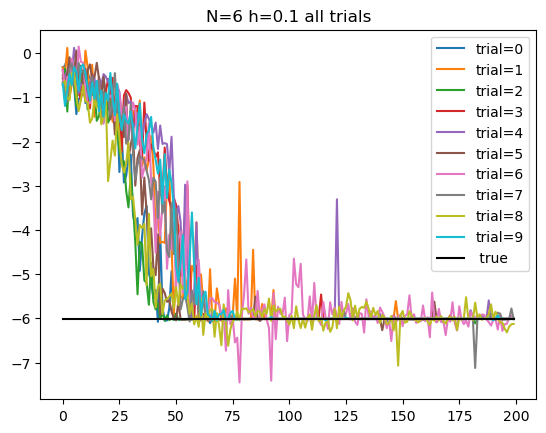

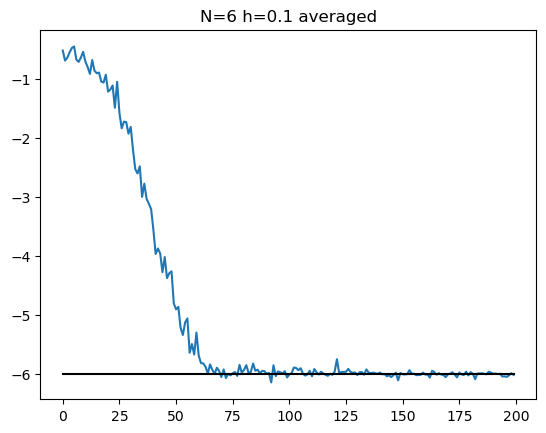

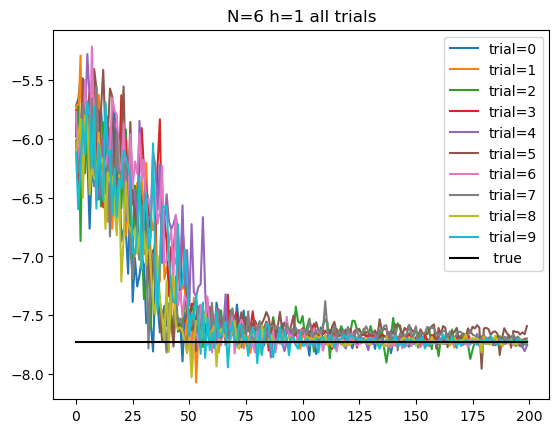

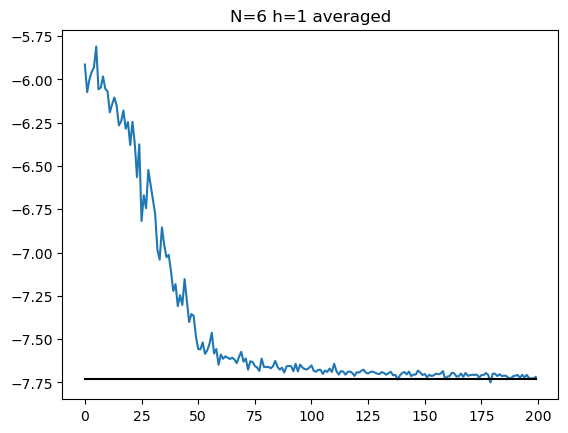

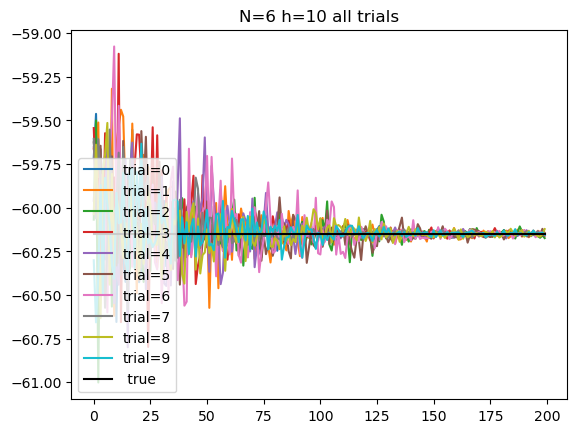

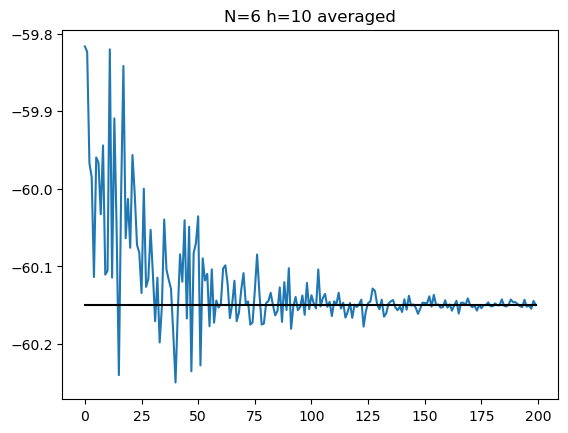

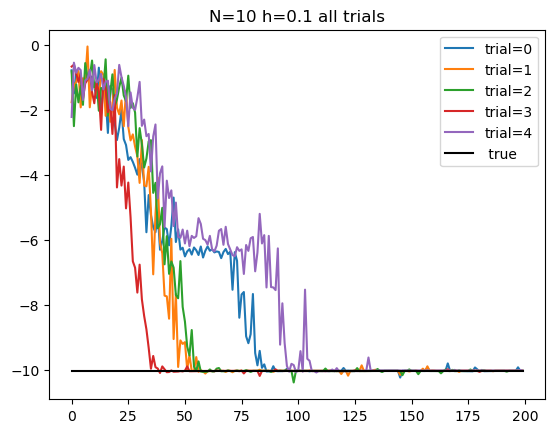

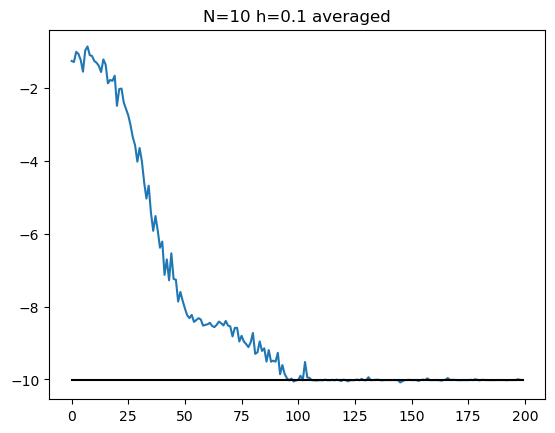

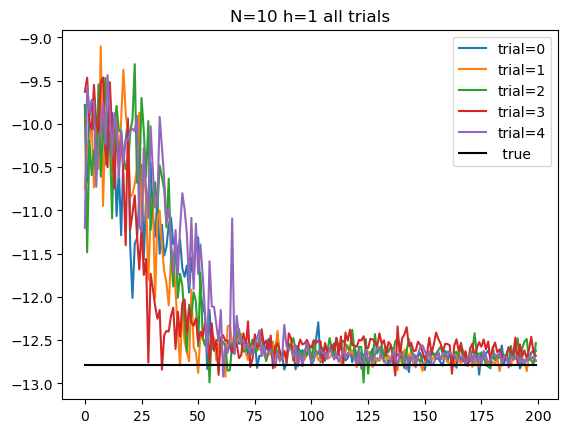

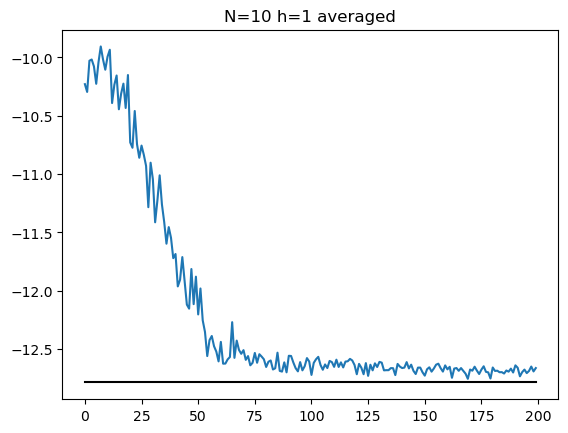

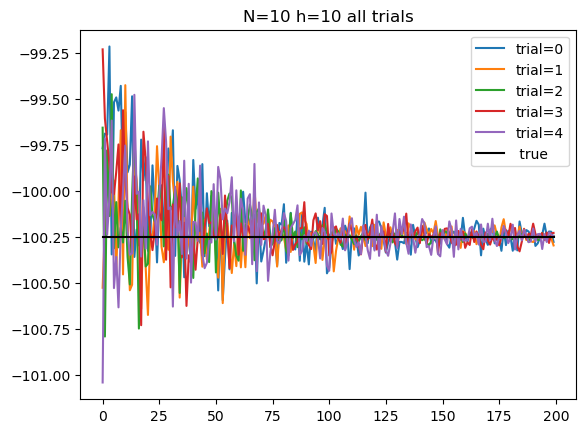

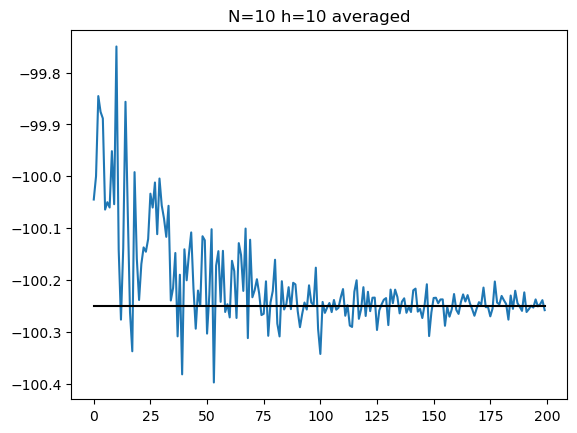

<Figure size 640x480 with 0 Axes>

In [6]:
for N in [6, 10]:
    data = pd.read_csv(f'data/KAN_n_{N}_data.csv')
    data = data.set_index(['N', 'h', 'trial', 'epoch'])
    num_trials = 10 if N == 6 else 5
    num_epochs = 200
    for h in [0.1, 1, 10]:
        true_gse = lib.ground_state_energy(h, N)
        all_energies = []
        for t in range(num_trials):
            energies = [data['energy'].loc[(N, h, t, epoch)] for epoch in range(num_epochs)]
            all_energies.append(energies)
            plt.plot([n for n in range(num_epochs)], energies, label = f"trial={t}")
        plt.plot([0, num_epochs - 1], [true_gse] * 2, label = ' true', color = 'black')
        plt.title(f'N={N} h={h} all trials')
        plt.legend(loc = 'best')
        plt.show()
        plt.clf()

        all_energies = np.array(all_energies)
        all_energies = all_energies.mean(axis=0)
        plt.title(f'N={N} h={h} averaged')
        plt.plot([n for n in range(num_epochs)], all_energies)
        plt.plot([0, num_epochs - 1], [true_gse] * 2, label = ' true', color = 'black')
        plt.show()
        plt.clf()